In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [15]:
#creating database connection
conn=sqlite3.connect('inventory.db')
#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaceRation,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,60320,1584606.40,9578.0,344712.22,64889.97,17598.14,68601.68,-1239894.18,-359.689651,0.158786,5.714725,0.217538
1,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,96073,1553500.41,20226.0,444810.74,43304.31,37163.76,257032.07,-1108689.67,-249.249753,0.210527,4.629925,0.286328
2,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,62385,1446708.15,9203.0,275162.97,52289.50,16909.12,144929.24,-1171545.18,-425.764114,0.147519,4.410723,0.190199
3,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,75385,1375022.40,11189.0,288135.11,48202.30,20557.97,123780.22,-1086887.29,-377.214457,0.148425,3.822181,0.209549
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,58783,1286759.87,11883.0,357759.17,52774.51,21833.58,257032.07,-929000.70,-259.672086,0.202150,6.086099,0.278031


In [16]:
#EDA

In [17]:
#summary statistics T means transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8512.0,1.015346e+04,17718.122212,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,8512.0,1.760026e+04,13004.702546,58.00,5297.750000,17432.500000,24988.000000,9.063100e+04
PurchasePrice,8512.0,2.188977e+01,105.829821,0.36,6.800000,10.270000,18.240000,5.681810e+03
ActualPrice,8512.0,3.218842e+01,144.210224,0.49,10.990000,15.990000,26.990000,7.499990e+03
Volume,8512.0,8.548756e+02,617.982459,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8512.0,1.691844e+03,5496.001551,1.00,24.000000,231.500000,1195.000000,1.607350e+05
TotalPurchaseDollars,8512.0,1.578656e+04,56938.194190,0.71,344.880000,2840.535000,12601.875000,1.584606e+06
TotalSalesQuantity,8512.0,2.872162e+02,967.741069,0.00,3.000000,34.000000,200.000000,2.854400e+04
TotalSalesDollars,8512.0,3.873112e+03,13541.331564,0.00,59.940000,649.745000,3129.827500,4.448107e+05
TotalSalesPrice,8512.0,1.890345e+03,4290.868376,0.00,22.692500,363.675000,1831.792500,6.488997e+04


ValueError: num must be an integer with 1 <= num <= 16, not 17

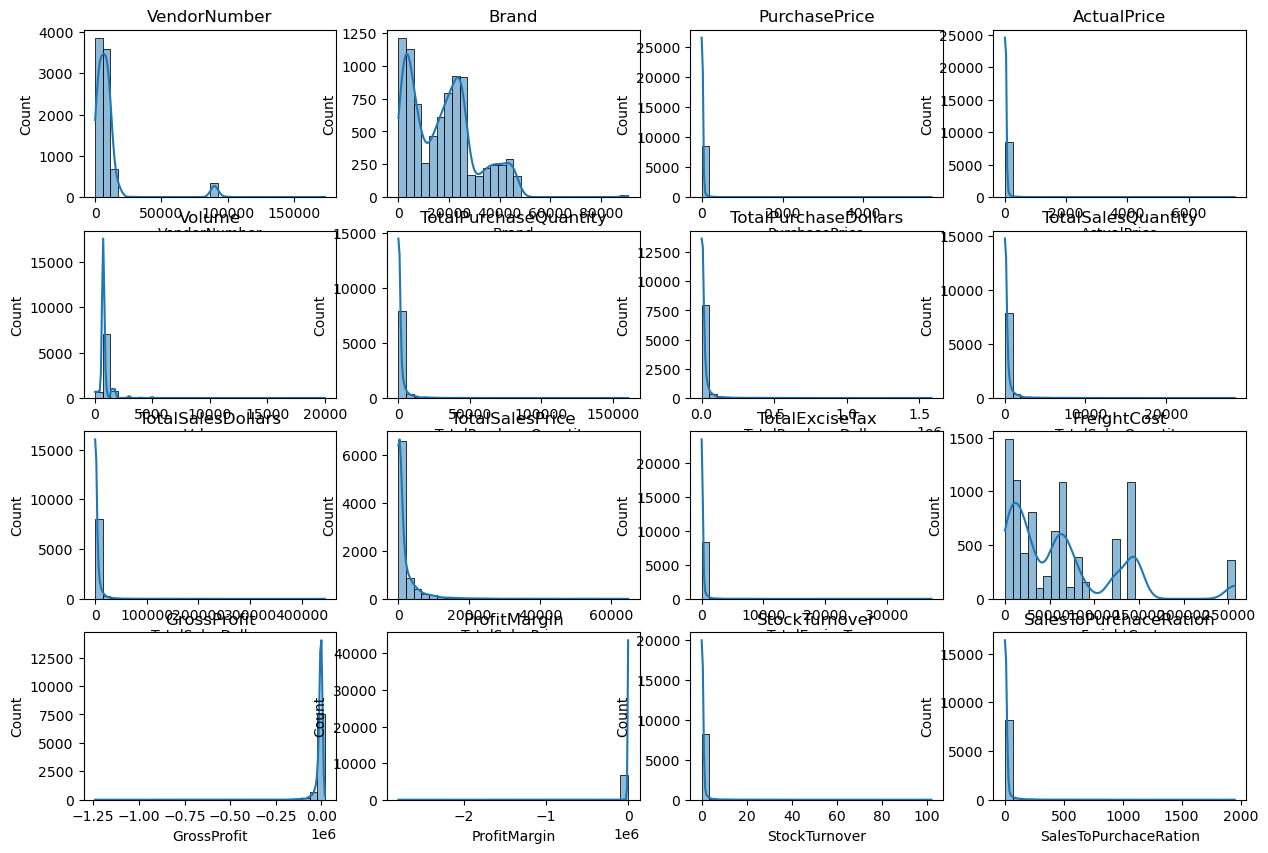

In [19]:
#distribution plots for numerical colunms
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout
    sns.histplot(df[col],kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 16, not 17

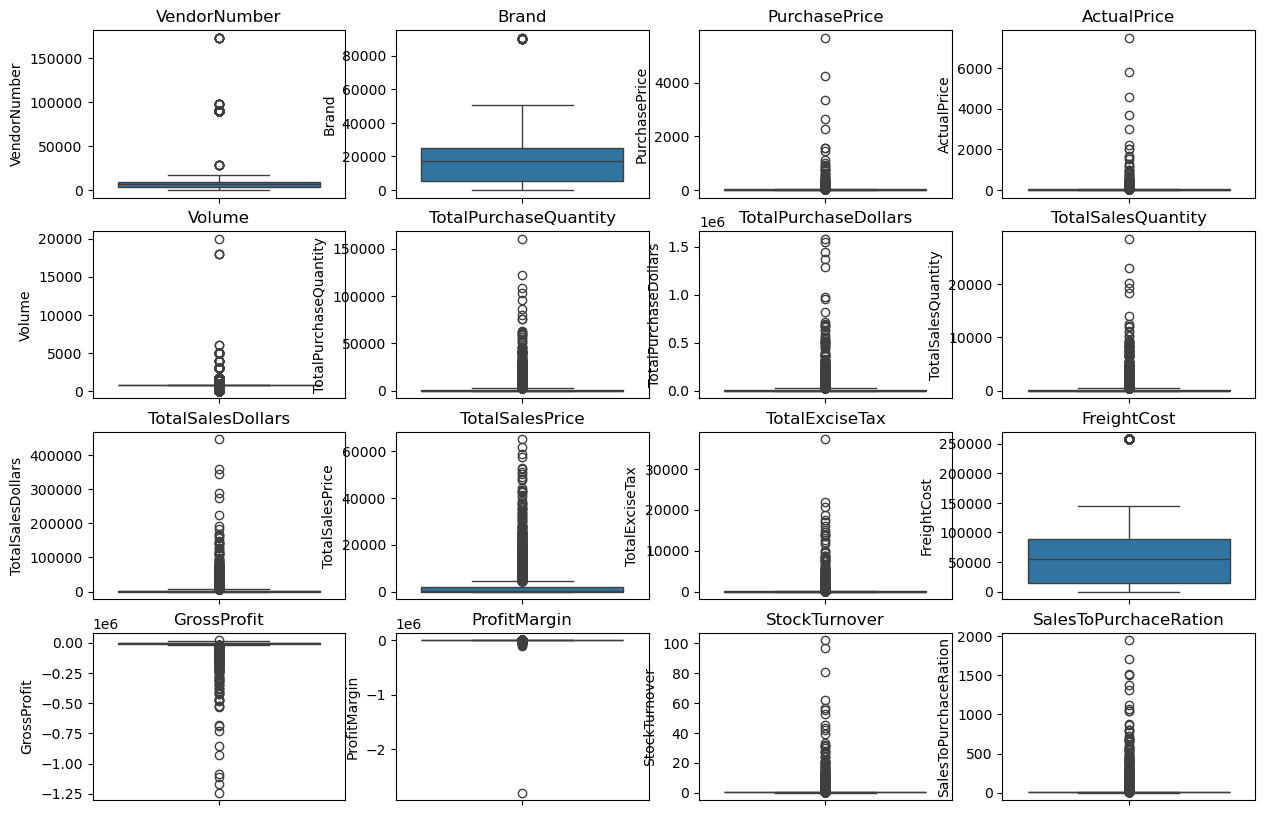

In [20]:
#boxplot
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) 
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [21]:
#lets filter the data by removing inconsistencies
df =pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity >  0""",conn)

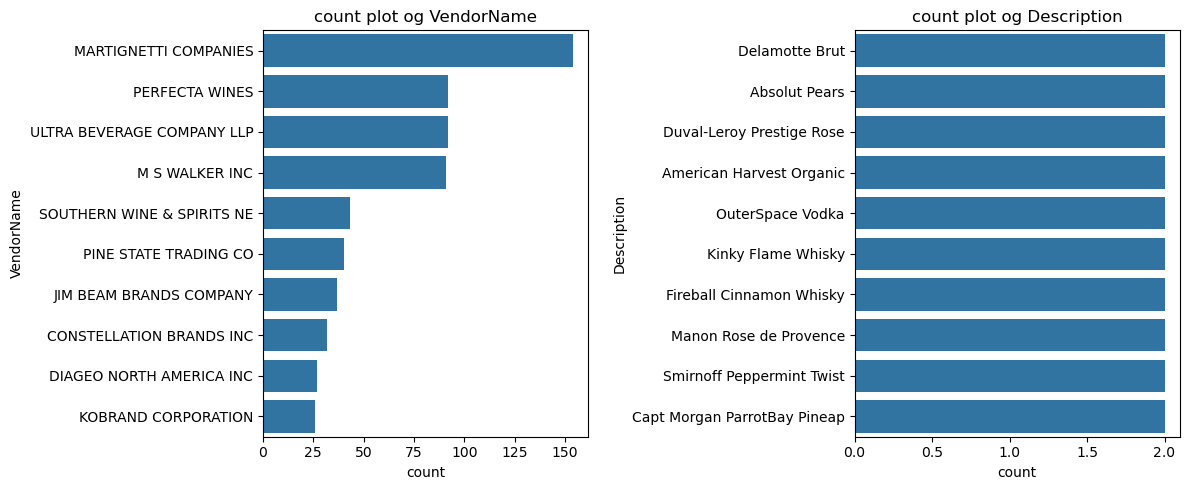

In [22]:
categorial_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i , col in enumerate(categorial_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col] , order=df[col].value_counts().index[:10])
    plt.title(f"count plot og {col}")
plt.tight_layout()
plt.show()

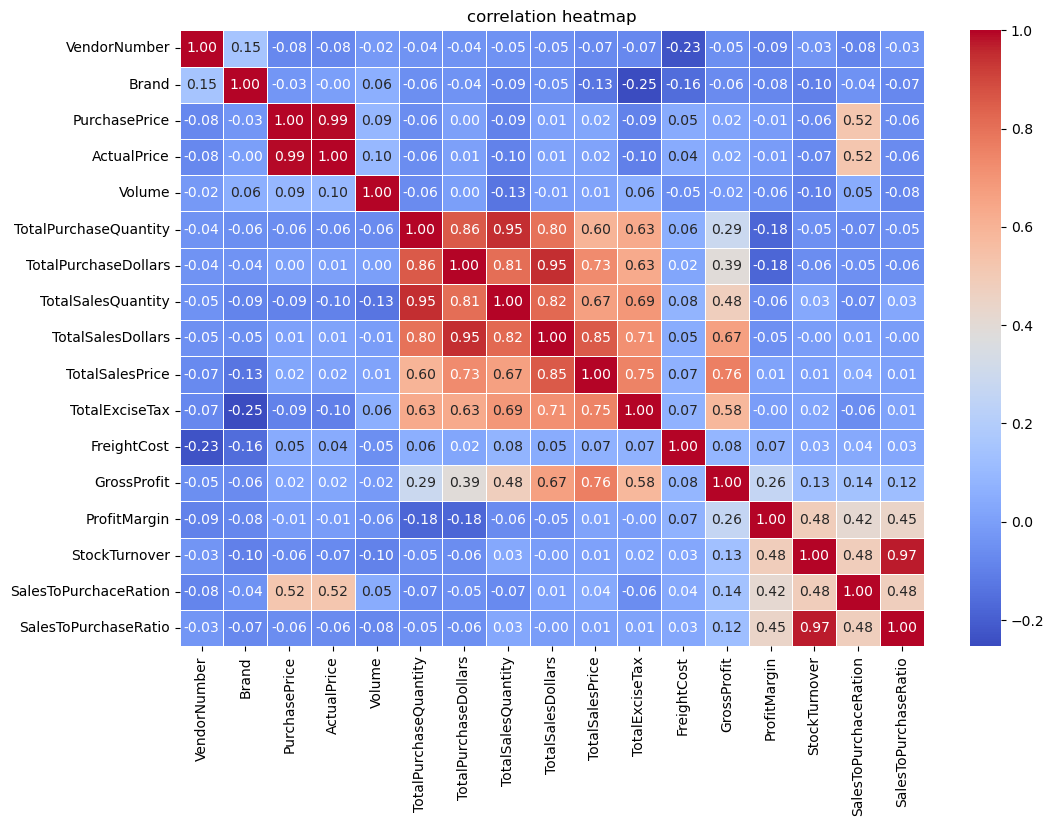

In [23]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f" ,cmap="coolwarm",linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

In [24]:
#data analysis
#IDENTIFY BRAND THAT NEEDS PROMOTIONAL OR PRICING ADJUSTMENTS WHICH EXHIBIT LOWER SALES PERFORMANCE BUT HIGHER PROFIT MARGIN


In [25]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [26]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.5)

In [27]:
low_sales_threshold

117.98

In [28]:
high_margin_threshold

53.62661513497994

In [29]:
target_brands=brand_performance[
     (brand_performance['TotalSalesDollars']<=low_sales_threshold)&
     (brand_performance['ProfitMargin']>=high_margin_threshold)
]
print("brands with low sales but high profit margin :")
display(target_brands.sort_values('TotalSalesDollars'))

brands with low sales but high profit margin :


,Description,TotalSalesDollars,ProfitMargin
298,Concannon Glen Ellen Wh Zin,5.97,55.778894
784,Sauza Sparkling Margarita,13.98,61.516452
888,The Club Mudslide,21.89,66.879854
604,Merry Irish Cream Liqueur,35.97,73.533500
845,Stark Raving Cab Svgn,35.97,81.734779
721,Promesses de France CdRhone,39.95,86.207760
539,La Petite Maison Ventoux Bl,41.94,56.127802
575,Mad Dogs & Englishmen Jumil,41.97,84.441268
326,DeKuyper Mixed Berry Medley,43.96,81.892630
915,Tracia Syrah,44.94,88.495772


In [30]:
def format_dollars(value):
    if value>+1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}k"
    else:
        return str(value)

        

In [31]:
#top vendors and brands by  sales performnace
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         243980.10
CONSTELLATION BRANDS INC      180305.21
ULTRA BEVERAGE COMPANY LLP    148726.20
M S WALKER INC                117693.77
PERFECTA WINES                114277.24
BACARDI USA INC                61602.49
BROWN-FORMAN CORP              46884.09
DIAGEO NORTH AMERICA INC       42011.94
JIM BEAM BRANDS COMPANY        41429.49
SOUTHERN WINE & SPIRITS NE     40497.96
Name: TotalSalesDollars, dtype: float64

In [32]:
top_brands

Description
Simi Chard                      93369.42
Simi Cab Svgn                   46523.13
Banfi Centine Mntcln Tscna      31728.09
Rodney Strong Cab Svgn          31245.60
Ch La Rousseliere St Estephe    29698.02
Buehler Chard RRV               27397.25
Madison's Ranch Cab Svgn        24797.91
Rodney Strong Chard             20080.57
Cava Mistinguett Brut           18241.17
Bacardi Twin Pack 2/750mls      17331.33
Name: TotalSalesDollars, dtype: float64

In [33]:
top_brands.apply(lambda x: format_dollars(x))

Description
Simi Chard                      93.37k
Simi Cab Svgn                   46.52k
Banfi Centine Mntcln Tscna      31.73k
Rodney Strong Cab Svgn          31.25k
Ch La Rousseliere St Estephe    29.70k
Buehler Chard RRV               27.40k
Madison's Ranch Cab Svgn        24.80k
Rodney Strong Chard             20.08k
Cava Mistinguett Brut           18.24k
Bacardi Twin Pack 2/750mls      17.33k
Name: TotalSalesDollars, dtype: object

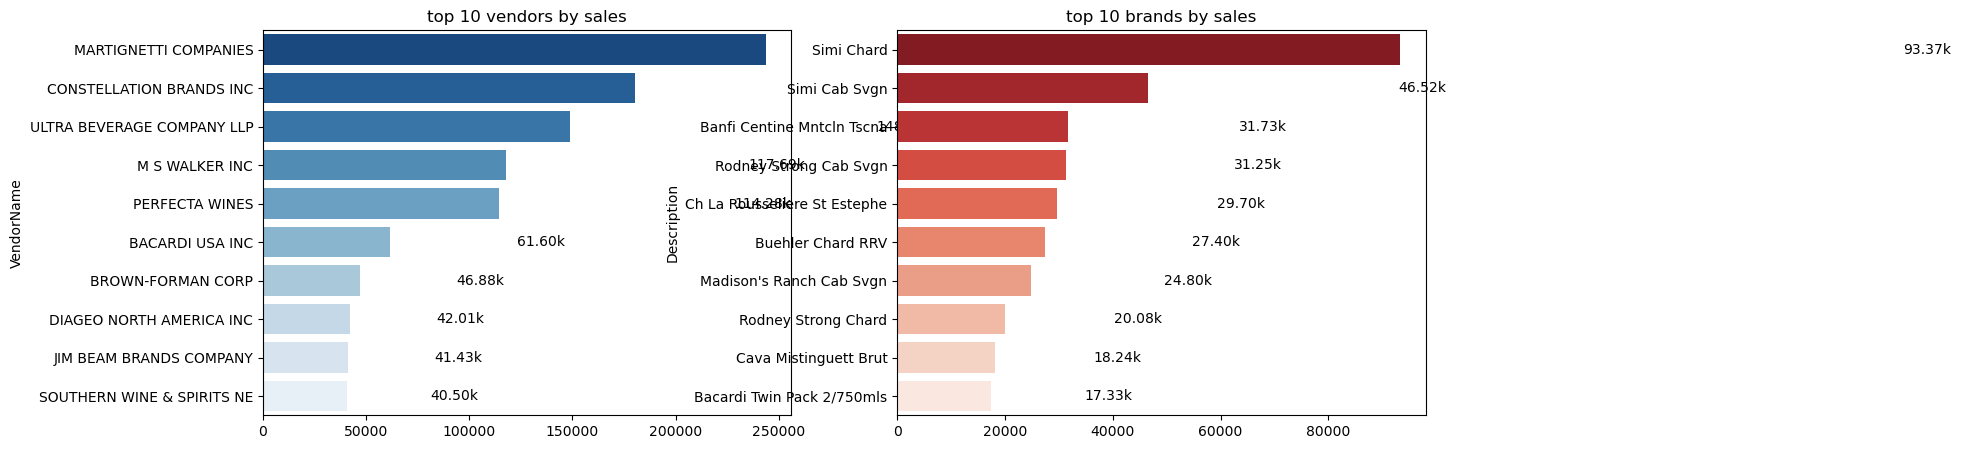

In [34]:
plt.figure(figsize=(15,5))

#PLOT TOP VENDORS
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title("top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() +0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

#PLOT FOR TOP BRANDS
plt.subplot(1, 2, 2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values, palette="Reds_r")
plt.title("top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()+0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()


In [35]:
#WHICH VENDORS CONTRIBUTE THE MOST TO TOTAL PURCHASE DOLLARS


In [81]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [82]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [83]:
round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
9,CONSTELLATION BRANDS INC,155184.04,25121.17,180305.21,21.19
33,MARTIGNETTI COMPANIES,106115.65,137864.45,243980.10,14.49
42,PERFECTA WINES,65884.50,48392.74,114277.24,8.99
63,ULTRA BEVERAGE COMPANY LLP,56969.42,91756.78,148726.20,7.78
31,M S WALKER INC,46582.51,71111.26,117693.77,6.36
...,...,...,...,...,...
32,MARSALLE COMPANY,78.78,1378.41,1457.19,0.01
20,FANTASY FINE WINES CORP,64.32,15.58,79.90,0.01
6,CAPSTONE INTERNATIONAL,54.64,173.24,227.88,0.01
68,WEIN BAUER INC,36.56,5.38,41.94,0.00


In [84]:
#DISPLAY TOP10 VENDORS
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ALISA CARR BEVERAGES,2.41k,2.87k,5.28k,0.328946
1,ATLANTIC IMPORTING COMPANY,620.4,129.35000000000002,749.75,0.084701
2,BACARDI USA INC,30.94k,30.66k,61.60k,4.224002
3,BANFI PRODUCTS CORP,33.93k,3.67k,37.59k,4.631674
4,BROWN-FORMAN CORP,9.49k,37.39k,46.88k,1.296167
5,CAMPARI AMERICA,2.01k,2.00k,4.01k,0.274613
6,CAPSTONE INTERNATIONAL,54.64,173.24,227.88,0.007460
7,CASTLE BRANDS CORP.,862.4399999999999,850.94,1.71k,0.117746
8,CHARLES JACQUIN ET CIE INC,91.08,635.88,726.96,0.012435
9,CONSTELLATION BRANDS INC,155.18k,25.12k,180.31k,21.186683


In [85]:
top_vendors['PurchaseContribution%'].sum()

32.16442671812865

In [86]:
top_vendors['Cumulative_Contribution']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution
0,ALISA CARR BEVERAGES,2.41k,2.87k,5.28k,0.328946,0.328946
1,ATLANTIC IMPORTING COMPANY,620.4,129.35000000000002,749.75,0.084701,0.413647
2,BACARDI USA INC,30.94k,30.66k,61.60k,4.224002,4.637649
3,BANFI PRODUCTS CORP,33.93k,3.67k,37.59k,4.631674,9.269323
4,BROWN-FORMAN CORP,9.49k,37.39k,46.88k,1.296167,10.565490
5,CAMPARI AMERICA,2.01k,2.00k,4.01k,0.274613,10.840103
6,CAPSTONE INTERNATIONAL,54.64,173.24,227.88,0.007460,10.847563
7,CASTLE BRANDS CORP.,862.4399999999999,850.94,1.71k,0.117746,10.965309
8,CHARLES JACQUIN ET CIE INC,91.08,635.88,726.96,0.012435,10.977743
9,CONSTELLATION BRANDS INC,155.18k,25.12k,180.31k,21.186683,32.164427


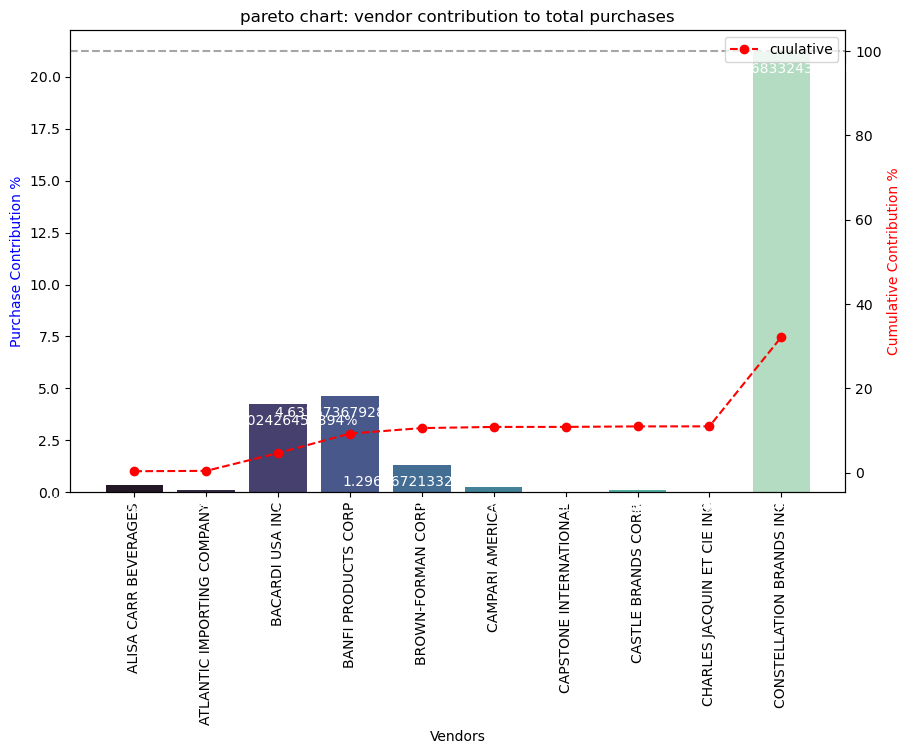

In [67]:
fig, ax1=plt.subplots(figsize=(10,6))

#BARPLOT FOR PURCHASES CONTRIBUTION
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette="mako",ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1 , str(value)+'%', ha='center', fontsize=10, color= 'white')

#INE PLOT FOR COMMULATIVE CONTRIBUTION
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution%'],color='red',marker='o',linestyle='dashed',label='cuulative')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contribution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('pareto chart: vendor contribution to total purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed' ,alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

In [54]:
#HOW MUCH OF TOTAL PROCUREMENT IS DEPENDENT ON THE TOP VENDORS

In [68]:
print(f"Total Purcahse contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purcahse contribution of top 10 vendors is 32.16%


NameError: name 'gca' is not defined

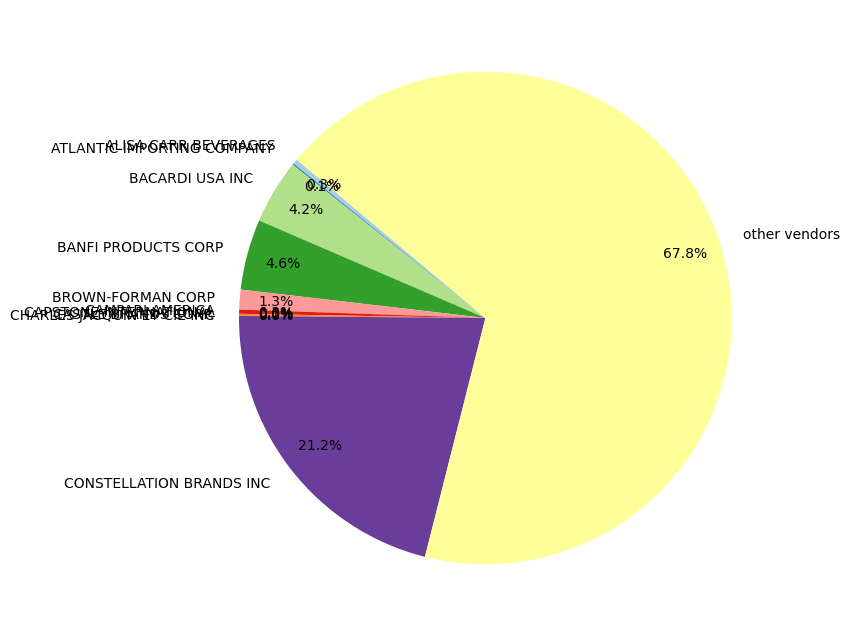

In [96]:
vendors=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

#append other vendors
vendors.append("other vendors")
purchase_contribution.append(remaining_contribution)

#donut chart
fig, ax=plt.subplots(figsize=(8,8))
wedges, texts,autotexts=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',
                               startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#DRAW A WHITE CIRCLE IN CENTER TO CREATE  DONUT
centre_circle=plt.Circle((0, 0),0.07 ,fc='white')
fig,gca().add_artist(centre_circle)

#add total contributin annotation
plt.text(0,0,f"top 10 total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("top 10 vendor's purchase contribution (%)")
plt.show()